In [ ]:
import librosa 
import pandas as pd 
import numpy as np
import random 
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import Audio

2025-04-14 14:05:24.908051: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 14:05:25.176090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744639525.257880    1579 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744639525.289345    1579 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-14 14:05:25.540014: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

: 

: 

: 

In [4]:
audiofiles = pd.read_csv('data/UrbanSound8K.csv')
audiofiles.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
audiofiles['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [6]:
list(np.where(audiofiles['class']=='gun_shot')[0])[0]

np.int64(106)

In [7]:
idx = list(np.where(audiofiles['class'] == 'gun_shot')[0])[0]
arr = np.array(audiofiles['slice_file_name'])
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

# Construct the file path
file_path = os.path.join("data", "fold" + str(fold[idx]), str(arr[idx]))
full_path = os.path.join("/home/sanjai/mlprojects/Unisys", file_path)

# Check if the file exists and load it
if os.path.exists(full_path):
    original_audio, sample_rate = librosa.load(full_path)
    display(Audio(data=original_audio, rate=sample_rate))
else:
    print(f"File not found at: {full_path}")

Text(0.5, 23.52222222222222, 'Time [secs]')

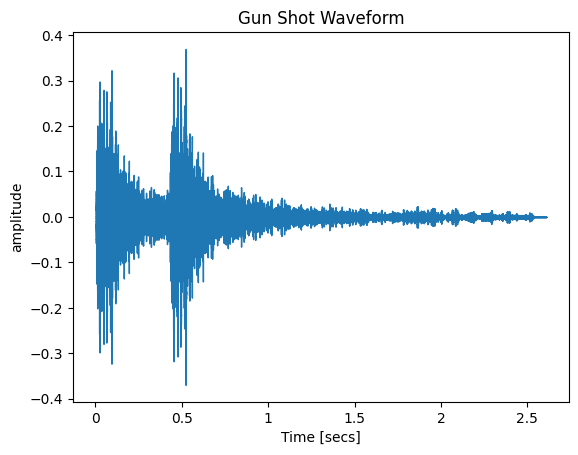

In [8]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(nrows=1, sharex=True)
librosa.display.waveshow(original_audio,sr=sample_rate,ax=ax)
ax.set(title='Gun Shot Waveform')
ax.set_ylabel('amplitude')
ax.set_xlabel('Time [secs]')

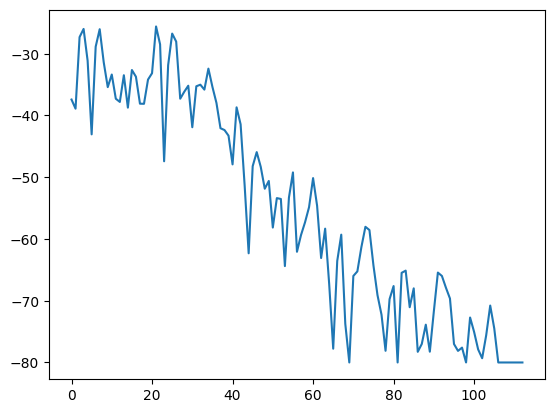

In [9]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(original_audio)),ref = np.max)
D.shape

plt.plot(D[100])

Text(0.5, 1.0, 'gun_shot')

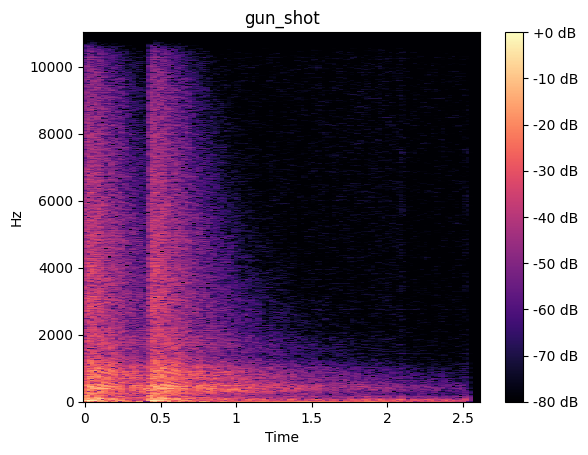

In [10]:
librosa.display.specshow(D,y_axis='linear',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(cla[idx])

Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold6/184805-0-0-57.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold6/197075-3-6-0.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold4/30832-3-5-1.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold4/174032-2-0-11.wav
Attempting to load: /home/sanjai/mlprojects/Unisys/data/fold3/135526-6-2-0.wav


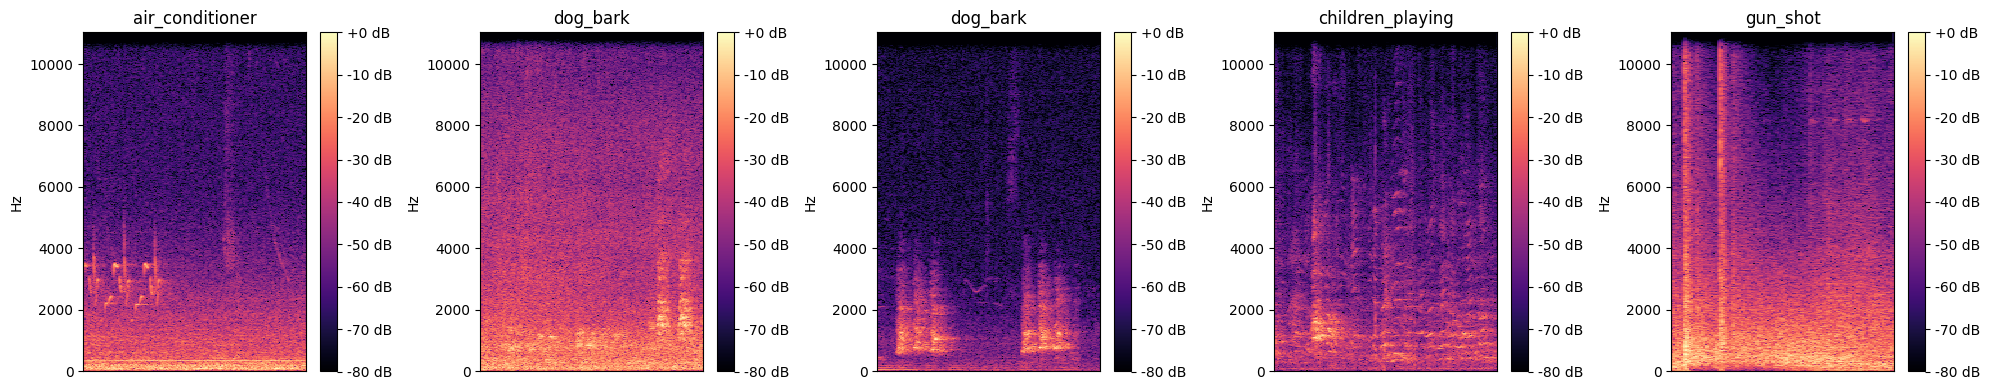

In [11]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Randomly select 5 samples
rng = np.random.default_rng()
sample = rng.integers(0, audiofiles.shape[0], size=5)

# Create a single figure with 5 subplots
plt.figure(figsize=(20, 4))

for idx, i in enumerate(sample, 1):
    # Construct the correct local file path
    path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold" + str(fold[i]), str(arr[i]))
    print(f"Attempting to load: {path}")  # Debug print
    # Check if file exists before loading
    if os.path.exists(path):
        data, sampling_rate = librosa.load(path)
        # Compute STFT and convert to dB
        D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
        # Add subplot
        plt.subplot(1, 5, idx)
        librosa.display.specshow(D, y_axis='linear', sr=sampling_rate)
        plt.colorbar(format='%+2.0f dB')
        plt.title(cla[i])
    else:
        print(f"File not found: {path}")
        plt.subplot(1, 5, idx)
        plt.text(0.5, 0.5, "File Not Found", ha='center', va='center')
        plt.title(cla[i])

# Adjust layout and display
plt.tight_layout()
plt.show()

Loading file: /home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav
Mel-spectrogram shape: (128, 113)
Class: gun_shot


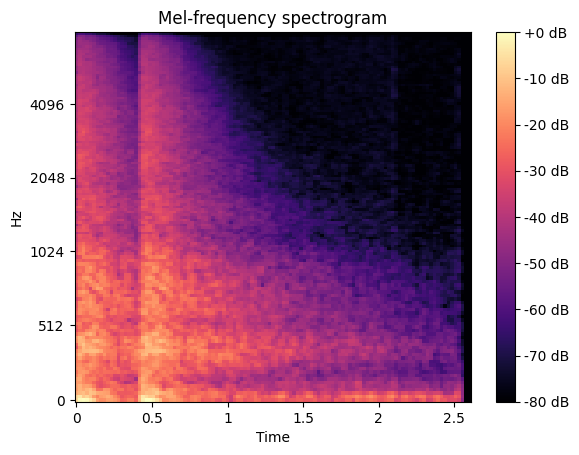

In [12]:
idx = list(np.where(audiofiles['class'] == 'gun_shot')[0])[0]
arr = np.array(audiofiles['slice_file_name'])
fold = np.array(audiofiles['fold'])
cla = np.array(audiofiles['class'])

# Construct the correct local path
path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold" + str(fold[idx]), str(arr[idx]))
print(f"Loading file: {path}")  # Debug print

# Load audio if the file exists
if os.path.exists(path):
    data, sampling_rate = librosa.load(path)
    # Compute Mel-spectrogram
    melspec = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    print("Mel-spectrogram shape:", melspec.shape)
    print("Class:", cla[idx])
    # Play audio
    display(Audio(data=data, rate=sampling_rate))
    
    # Plot Mel-spectrogram
    fig, ax = plt.subplots()
    S_dB = librosa.power_to_db(melspec, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', 
                                   sr=sampling_rate, fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    plt.show()
else:
    print(f"File not found: {path}")

In [13]:
feature = []
label = []

for i in range(len(audiofiles)):
    filename = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold" + str(audiofiles['fold'][i]), str(audiofiles['slice_file_name'][i]))
    X, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    feature.append(mels)
    label.append(audiofiles['classID'][i])

/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [14]:
classids = audiofiles['classID'].unique()
classes = audiofiles['class'].unique()

In [15]:
classids

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4])

In [16]:
classes

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [17]:
temp = np.array([feature,label],dtype='object')
data = temp.transpose()

In [18]:
X_ = data[:,0]
Y = data[:,1]

print(X_.shape,Y.shape)

(8732,) (8732,)


In [19]:
X = np.empty([8732,128])

for i in range(8732):
    X[i] = (X_[i])

In [20]:
Y = to_categorical(Y)

In [21]:
print(X.shape)
(Y.shape)

(8732, 128)


(8732, 10)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=123,test_size = 0.2)
print('Number of Train Samples',X_train.shape[0])
print('Number of test samples',X_test.shape[0])

Number of Train Samples 6985
Number of test samples 1747


In [23]:
model = Sequential(
        [
            Dense(1000,activation='relu',input_shape=(128,)),
            Dense(750,activation='relu'),
            Dense(500,activation='relu'),
            Dense(250,activation='relu'),
            Dense(100,activation='relu'),
            Dense(50,activation='relu'),
            Dense(10,activation='softmax'),
            
        ]
)

model.summary()

/home/sanjai/anaconda3/envs/tf_gpu/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744639987.133132    1579 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,160 (5.38 MB)

 Trainable params: 1,411,160 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=90,batch_size=50,validation_data=[X_test,Y_test])

Epoch 1/90


I0000 00:00:1744639989.601533    3944 service.cc:148] XLA service 0x7f64500200a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744639989.602199    3944 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-04-14 14:13:09.647915: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744640038.578687    3944 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-14 14:13:10.919779: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 44 bytes spill stores, 44 bytes spill loads

2025-04-14 14:13:10.920434: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 112 bytes 

 58/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1662 - loss: 2.6393   

I0000 00:00:1744640001.612412    3944 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


138/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2054 - loss: 2.4684

2025-04-14 14:13:22.715779: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 44 bytes spill stores, 44 bytes spill loads

2025-04-14 14:13:22.742302: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 112 bytes spill stores, 112 bytes spill loads

2025-04-14 14:13:22.938960: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 556 bytes spill stores, 432 bytes spill loads

2025-04-14 14:13:23.089497: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 300 bytes spill stores, 364 bytes spill loads

2025-04-14 14:13:23.181093: I external/local_xla/xla/strea

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2063 - loss: 2.4651

2025-04-14 14:13:33.870337: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_55', 44 bytes spill stores, 44 bytes spill loads

2025-04-14 14:13:33.944527: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_55', 112 bytes spill stores, 112 bytes spill loads

2025-04-14 14:13:34.067009: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_55', 556 bytes spill stores, 432 bytes spill loads

2025-04-14 14:13:34.236469: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_55', 300 bytes spill stores, 364 bytes spill loads

2025-04-14 14:13:34.347448: I external/local_xla/xla/stream_ex

140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 125ms/step - accuracy: 0.2068 - loss: 2.4636 - val_accuracy: 0.3807 - val_loss: 2.0194
Epoch 2/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3960 - loss: 1.8218 - val_accuracy: 0.3892 - val_loss: 1.7611
Epoch 3/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 49s 354ms/step - accuracy: 0.4696 - loss: 1.6409 - val_accuracy: 0.5014 - val_loss: 1.5136
Epoch 4/90
140/140 ━━━━━━━━━━━━━━━━━━━━ -48s -347924us/step - accuracy: 0.5628 - loss: 1.3231 - val_accuracy: 0.5495 - val_loss: 1.3983
Epoch 5/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6085 - loss: 1.2014 - val_accuracy: 0.6068 - val_loss: 1.3012
Epoch 6/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6794 - loss: 0.9801 - val_accuracy: 0.6657 - val_loss: 1.0576
Epoch 7/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7231 - loss: 0.8556 - val_accuracy: 0.6537 - val_loss: 1.1220
Epoch 8/90
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7506 - loss: 0.7808 - val_accuracy:

In [25]:
classes = audiofiles.groupby('classID')['class'].unique()
classes

classID
0     [air_conditioner]
1            [car_horn]
2    [children_playing]
3            [dog_bark]
4            [drilling]
5       [engine_idling]
6            [gun_shot]
7          [jackhammer]
8               [siren]
9        [street_music]
Name: class, dtype: object

In [26]:
def prediction_parser(filename,model):
    feature = []
    label = []
    # Here kaiser_fast is a technique used for faster extraction
    audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    # We extract mfcc feature from data
    mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T,axis=0)        
    feature.append(mels)
    label.append(audiofiles["class"][audiofiles['slice_file_name']==filename.split('/',5)[5]].values[0])
    temp_preds = np.array([feature,label],dtype=object)
    data_preds = temp_preds.transpose()
    X_ = data_preds[:, 0]
    X = np.empty([1, 128])
    X[0] = (X_[0])
    Audio(data = original_audio, rate = sample_rate)
    classid = np.argmax(model.predict(X))
    print('Class predicted :',classes[classid][0],'\n\n','actual',label)
    return (Audio(data = audiodata, rate = sample_rate))

In [27]:
import os
import numpy as np
import librosa

def prediction_parser(filename, model):
    # Load audio and extract Mel-spectrogram feature
    audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)
    
    # Prepare feature for prediction (shape: (1, 128))
    feature = np.array([mels], dtype=np.float32)  # Add batch dimension
    
    # Predict using the model
    prediction = model.predict(feature)
    return prediction

# Usage
file_path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold1", "102305-6-0-0.wav")
prediction = prediction_parser(file_path, model)
print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Prediction: [[2.5834564e-05 1.4448361e-04 8.1191743e-03 2.8240765e-03 4.7824701e-04
  4.1435592e-04 9.8695159e-01 2.6995665e-04 2.6130596e-05 7.4598507e-04]]


In [28]:
audiodata, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)
feature = np.array([mels], dtype=np.float32)
print("Feature shape:", feature.shape)  # Should be (1, 128)
print("Feature dtype:", feature.dtype)  # Should be float32
prediction = model.predict(feature)
print("Prediction:", prediction)

Feature shape: (1, 128)
Feature dtype: float32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction: [[2.5834564e-05 1.4448361e-04 8.1191743e-03 2.8240765e-03 4.7824701e-04
  4.1435592e-04 9.8695159e-01 2.6995665e-04 2.6130596e-05 7.4598507e-04]]


In [29]:
def prediction_parser(filename, model):
    audiodata, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mels = np.mean(librosa.feature.melspectrogram(y=audiodata, sr=sample_rate).T, axis=0)
    feature = np.array([mels], dtype=np.float32)
    base_filename = os.path.basename(filename)
    true_label = audiofiles["class"][audiofiles['slice_file_name'] == base_filename].values[0]
    prediction = model.predict(feature)
    return prediction, true_label

file_path = os.path.join("/home/sanjai/mlprojects/Unisys/data", "fold1", "102305-6-0-0.wav")
pred, true = prediction_parser(file_path, model)
print("Prediction:", pred)
print("True label:", true)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: [[2.5834564e-05 1.4448361e-04 8.1191743e-03 2.8240765e-03 4.7824701e-04
  4.1435592e-04 9.8695159e-01 2.6995665e-04 2.6130596e-05 7.4598507e-04]]
True label: gun_shot


In [30]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


(array([[2.5834564e-05, 1.4448361e-04, 8.1191743e-03, 2.8240765e-03,
         4.7824701e-04, 4.1435592e-04, 9.8695159e-01, 2.6995665e-04,
         2.6130596e-05, 7.4598507e-04]], dtype=float32),
 'gun_shot')

In [31]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold5/17578-5-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


(array([[3.2673442e-33, 2.3996911e-14, 5.2593394e-19, 8.6609463e-13,
         8.4358168e-43, 1.0000000e+00, 1.1956713e-36, 1.1105107e-23,
         9.7231559e-21, 6.1782854e-23]], dtype=float32),
 'engine_idling')

In [32]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


(array([[2.5834564e-05, 1.4448361e-04, 8.1191743e-03, 2.8240765e-03,
         4.7824701e-04, 4.1435592e-04, 9.8695159e-01, 2.6995665e-04,
         2.6130596e-05, 7.4598507e-04]], dtype=float32),
 'gun_shot')

In [33]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold2/33849-3-4-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


(array([[4.6752075e-14, 1.0622966e-07, 1.0027426e-05, 9.9998713e-01,
         9.6820978e-09, 3.7684737e-15, 1.6089620e-13, 2.6423511e-18,
         2.6537871e-06, 1.3070709e-07]], dtype=float32),
 'dog_bark')

In [34]:
model.save("/home/sanjai/mlprojects/Unisys/saved_model/my_model.keras")

In [35]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold3/17853-5-0-1.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


(array([[0.14938791, 0.04801833, 0.08699358, 0.2294692 , 0.09360689,
         0.13404764, 0.02554419, 0.06018105, 0.06378847, 0.1089627 ]],
       dtype=float32),
 'engine_idling')

In [36]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


(array([[2.5834564e-05, 1.4448361e-04, 8.1191743e-03, 2.8240765e-03,
         4.7824701e-04, 4.1435592e-04, 9.8695159e-01, 2.6995665e-04,
         2.6130596e-05, 7.4598507e-04]], dtype=float32),
 'gun_shot')

In [37]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold8/7390-9-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 49s 49s/step


(array([[2.5978160e-09, 5.8790836e-14, 2.0650944e-11, 2.8281017e-12,
         3.2786726e-08, 1.0735877e-09, 5.4641696e-14, 2.6698543e-10,
         1.6226017e-13, 1.0000000e+00]], dtype=float32),
 'street_music')

In [38]:
def check_audio_type(file_path):
    
    file_name = os.path.basename(file_path)
    
    # Find the corresponding class from the dataset
    matching_row = audiofiles[audiofiles['slice_file_name'] == file_name]
    
    if not matching_row.empty:
        audio_class = matching_row['class'].values[0]
        print(f"Audio Class: {audio_class}")
        
        # Load and play the audio file
        if os.path.exists(file_path):
            original_audio, sample_rate = librosa.load(file_path)
            display(Audio(data=original_audio, rate=sample_rate))
        else:
            print("File not found.")
    else:
        print("Audio file not found in the dataset.")

# Provide the file path as input
file_path = "/home/sanjai/mlprojects/Unisys/data/fold8/7390-9-0-0.wav"
check_audio_type(file_path)


Audio Class: street_music


In [39]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold1/102305-6-0-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ -49s -48659369us/step


(array([[2.5834564e-05, 1.4448361e-04, 8.1191743e-03, 2.8240765e-03,
         4.7824701e-04, 4.1435592e-04, 9.8695159e-01, 2.6995665e-04,
         2.6130596e-05, 7.4598507e-04]], dtype=float32),
 'gun_shot')

## L2 regularization

**Dropout layers randomly deactivate neurons, improving generalization.
L2 regularization ensures smaller weight values, preventing overfitting.**

In [40]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(1000, activation='relu', input_shape=(128,), kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # 30% dropout
    Dense(750, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(500, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(250, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from tensorflow.keras.optimizers import AdamW

optimizer = AdamW(learning_rate=0.001, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate when validation loss stops improving
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history = model.fit(
    X_train, Y_train, 
    epochs=60,  # Reduce epochs from 90 to avoid overfitting
    batch_size=128,  # Increase batch size for stability
    validation_data=(X_test, Y_test), 
    callbacks=[lr_scheduler]  # Use learning rate scheduling
)

Epoch 1/60


2025-04-14 14:14:28.831997: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1923', 100 bytes spill stores, 100 bytes spill loads

2025-04-14 14:14:28.911614: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2232', 24 bytes spill stores, 24 bytes spill loads



47/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1590 - loss: 4.0606 

2025-04-14 14:14:32.679967: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1923', 20 bytes spill stores, 20 bytes spill loads

2025-04-14 14:14:33.352755: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1923', 104 bytes spill stores, 104 bytes spill loads

2025-04-14 14:14:33.505275: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2232', 260 bytes spill stores, 260 bytes spill loads



55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.1685 - loss: 4.0134

2025-04-14 14:14:36.957003: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 32 bytes spill stores, 32 bytes spill loads

2025-04-14 14:14:36.972426: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 112 bytes spill stores, 112 bytes spill loads

2025-04-14 14:14:37.114206: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 484 bytes spill stores, 484 bytes spill loads

2025-04-14 14:14:37.177789: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 24 bytes spill stores, 24 bytes spill loads

2025-04-14 14:14:37.291469: I external/local_xla/xla/stream_exec

55/55 ━━━━━━━━━━━━━━━━━━━━ 24s 330ms/step - accuracy: 0.1696 - loss: 4.0080 - val_accuracy: 0.3177 - val_loss: 3.1161 - learning_rate: 0.0010
Epoch 2/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3334 - loss: 3.0560 - val_accuracy: 0.4213 - val_loss: 2.6491 - learning_rate: 0.0010
Epoch 3/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4082 - loss: 2.5703 - val_accuracy: 0.4516 - val_loss: 2.3550 - learning_rate: 0.0010
Epoch 4/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4640 - loss: 2.3040 - val_accuracy: 0.4803 - val_loss: 2.1957 - learning_rate: 0.0010
Epoch 5/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 49s 907ms/step - accuracy: 0.4918 - loss: 2.1285 - val_accuracy: 0.4900 - val_loss: 2.1059 - learning_rate: 0.0010
Epoch 6/60
55/55 ━━━━━━━━━━━━━━━━━━━━ -48s -897467us/step - accuracy: 0.5111 - loss: 2.0128 - val_accuracy: 0.5226 - val_loss: 1.9639 - learning_rate: 0.0010
Epoch 7/60
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5279 - loss: 1.9186 - val_accurac

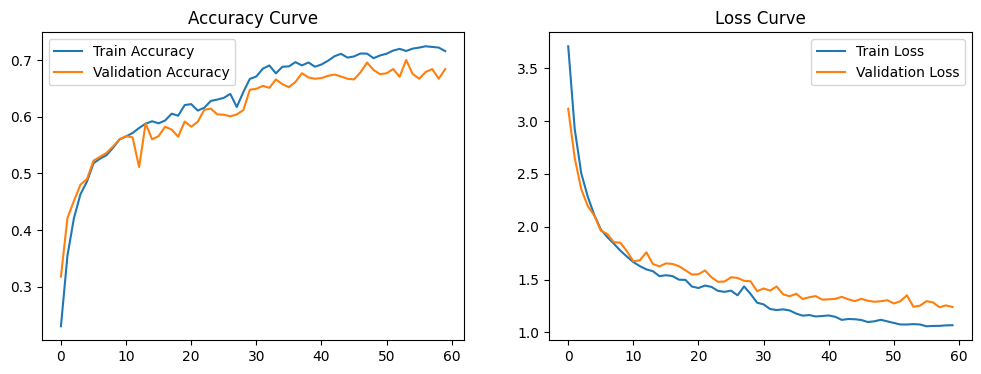

In [45]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")

plt.show()

In [48]:
prediction_parser('/home/sanjai/mlprojects/Unisys/data/fold5/162432-6-3-0.wav',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


(array([[1.4012985e-45, 2.7041120e-23, 3.0840538e-35, 1.3136889e-29,
         0.0000000e+00, 1.0000000e+00, 1.1141553e-31, 0.0000000e+00,
         0.0000000e+00, 7.9490337e-32]], dtype=float32),
 'gun_shot')

In [60]:
def check_audio_type(file_path):
    
    file_name = os.path.basename(file_path)
    
    # Find the corresponding class from the dataset
    matching_row = audiofiles[audiofiles['slice_file_name'] == file_name]
    
    if not matching_row.empty:
        audio_class = matching_row['class'].values[0]
        print(f"Audio Class: {audio_class}")
        
        # Load and play the audio file
        if os.path.exists(file_path):
            original_audio, sample_rate = librosa.load(file_path)
            display(Audio(data=original_audio, rate=sample_rate))
        else:
            print("File not found.")
    else:
        print("Audio file not found in the dataset.")

# Provide the file path as input
file_path = "/home/sanjai/mlprojects/Unisys/data/fold5/162432-6-11-0.wav"
check_audio_type(file_path)

Audio Class: gun_shot
